In [331]:
import json
import pandas as pd
import requests
from pyjstat import pyjstat

import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
import seaborn as sns
from datetime import datetime
from matplotlib.dates import DateFormatter
import matplotlib

def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

# Utredning for innføring av turistskatt i Nord-Norge

##  Kap 1 Introduksjon
 
Norge har i de siste årene opplevd et stort oppsving i mengden turister som velger å feriere i landet vårt. Små tettsteder, omringet av urørt natur tiltrekker store turistmengder fra hele verden. Naturfenomener som nordlys og midnattssol blir omtalt som noe man er nødt til å oppleve. Turister tiltrekkes også for de mange varierte aktiviteter som er tilgjengelige, som skiaktiviteter, fjellklatring, hundesleder, eller basehopp fra sylspisse fjelltopper. Uansett om det er kalde vinterdager omringet i nordlys, eller varme sommernetter under midnattssol; Norge tilbyr unike opplevelser man ikke får ellers i verden. 
 

Samtidig har turistenes ønsker og behov endret seg og økt i omfang. Det er ikke lengre nok å bare se landskap, man ønsker å komme seg lengst mulig bort hovedveiene for å aktivt ta bruk og oppleve naturen på nært hold. Turer på oppgåtte stier, langs strandkanten og besøk på mindre tettsteder, blir stadig mer attraktivt. Turistene ønsker å oppleve mest mulig for å skape minner de kan ta med seg hjem. 
 
Ettersom turismen har økt, har dette bidratt til store økonomisk muligheter som vi tjener godt på, blant annet i hotellovernattinger, reise, restaurant, samt turistaktiviteter. Samtidig bidrar dette til økte utgifter for bla. kommuner og innbyggere i de mest populære turistdestinasjonene. Blant annet fører turismen til økt slitasje på fellesgoder som veier, rasteplasser, hoteller, flyplasser og severdighetspunkter. I mange tilfeller er heller ikke eksisterende infrastuktur dimensjonert for å takle en så stor tilstrømming av turister som det vi i løpet av de senere åt har sett. Resultatet kan fort bli at turismen blir sett på som et problem av befolkningen og at naturen ødelegges. I tillegg gir det turistene en dårligere opplevelse. 

Samtidig som turismen i Norge har økt, har også debatten om hvordan vi kan tilrettelegge for turisme og hvem som skal betale for den tiltatt. Hvem skal bære kostnaden med økt turisme og hvordan skal de finansieres? Stadig flere har tatt til orde for å innføre en turistskatt. Gjennom dette kan vi dekke turistrelaterte utgifter, samtidig som vi kan forbedre tilbudet til turister som ferierer i landet. 

Eksempler på bruk av midler fra en turistskatt kan være veier med trygge og bedre rasteplasser, utbygging av flere offentlige toalett, eller forbedret mobildekning hvor det nødvendigvis ikke er en stor befolkning. 

Turistskatt er et konsept som regjeringen nå foreslår skal testes ut i Norge. Kommunene i Lofoten blir først ut som pilotkommuner i 2024. Senere vil Nordkapp, Beitostølen, Geiranger og verdensarvfjordene på Vestlandet få kreve inn turistskatt, eller som regjeringen velger å kalle det besøksbidrag.

Mer konkret er en turistskatt en avgift som skal bidra til tilrettelegging av opplevelser, aktiviteter, informasjon og miljø fordi det påvirker turistenes totalopplevelse. Naturopplevelser en viktig del av turismen i Norge og er et fellesgode som ikke tilfaller en enkelt aktør, men som er av betydning for attraksjonsverdien og dermed har betydning for reiselivsbedriftenes kundegrunnlag og omsetning.

Det er samtidig viktig at denne nye inntekten tilfaller områder som har utfordringer med turisme og ikke forsvinner i statsregnskapet, eller brukes på vedlikehold som ikke er et fellesgode. Det er derfor vesentlig at disse pengene øremerkes for bruk til fellesgoder i lokalsamfunnene pengene kom fra.

Sammenlignet med andre land, har ikke vi i Norge godt like langt i å tilrettelegge og finansiere infrastruktur for turisme. Myndigheter i andre land har skjønt at turister også må bidra for å dekke kostnader som tilknyttes de godene de utnytter. Land som USA, Italia, Tyskland og Spania er slike land. Eksempelvis så har byer som Venezia innført besøksbidrag for overnattende turister, og Barcelona har egne skatter for cruisepassasjerer. (Kilde 1). Dette har hjulpet land og byer å skaffe en inntekt for infrastrukturen, men også gjort det mulig å spre mengden turister i løpet av et år. Blant annet ved å påføre en høyere skatt under høysesongen, og lavere skatt utenfor sesongen. For byer som Venezia er dette tiltak som har blitt nødvendige for å kunne kontrollere mengden besøkende turister under høysesongen (Buckley,2022). 

Andre aktuelle land med turistskatt er Østerrike, Belgia, Frankrike og Hellas for å nevne noen. I de fleste tilfellene er skatten knyttet mot overnattingssteder, men det kan være geografiske forskjeller innad i landene. Enkelte områder har ikke skatt, mens andre områder som f.eks. en rekke byer har skatt. 

I denne oppgaven skal jeg se nærmere på virkningen av å innføre turistskatt i et samfunnsøkonomisk perspektiv. Selv om det kunne vært hensiktsmessig å begrense oppgaven til f.eks. Lofoten velger jeg å avgrense oppgaven til Nord-Norge, for å få et størst mulig tilgang av data.  I kapittel 2 vil jeg se forsøke å gi et overblikk over reiselivsnæringen i Nord-Norge og i kapittel 3 vil jeg se nærmere på de samfunnsøkonomiske effektene av turistskatt, før jeg til slutt oppsummere i kapitel 4.


## Kap 2 Turistnæringen i dag

For Nord-Norge har turisme blitt en stadig større næring. Regionen opplevde en høy vekst av turisme før pandemien i 2020. Derfor har det blitt stadig viktigere å dekke de økende kostnadene innenfor infrastruktur og vedlikehold. Flyplasser, veinettet og skipshavner er infrastruktur som stadig moderniseres for å kunne håndtere en høyere kapasitet. Et eksempel av dette er Tromsø lufthavn, som er et av Nord-Norges mest besøkte flyplasser, og et knutepunkt for kortbanenettet. Lufthavn opplevde i 2019 2,3 millioner reisende, til tross for at lufthavnen bare har en kapasitet på 1,4 millioner reisende. Derfor blir det i dag bygget et nytt terminalbygg, noe som vil øke kapasiteten til 2,7 millioner reisende (Avinor, 2023). I tillegg er bygging av nye flyplasser i både Bodø og Mo i Rana under oppstart. Bodø Lufthavn og Evenes lufthavn har også store innfartsvei for turister som ønsker å reise i Lofoten. Evenes lufthavn har muligheter for leiebil fra flere aktører, samt tilknytning til E10 mot Lofoten. Samtidig har Bodø er et knutepunkt for mange mindre flyplasser i Lofoten, som Svolvær, Leknes og Stokmarknes.

In [332]:
postUrl = 'https://data.ssb.no/api/v0/no/table/08508/'

apiQuery = {
  "query": [
    {
      "code": "Lufthavn",
      "selection": {
        "filter": "item",
        "values": [
          "ENBO",
          "ENEV",
          "ENTC"
        ]
      }
    },
    {
      "code": "TrafikkType",
      "selection": {
        "filter": "item",
        "values": [
          "000"
        ]
      }
    },
    {
      "code": "TrafikkFly",
      "selection": {
        "filter": "item",
        "values": [
          "U"
        ]
      }
    },
    {
      "code": "PassasjerType",
      "selection": {
        "filter": "item",
        "values": [
          "AAT"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2017K1",
          "2017K2",
          "2017K3",
          "2017K4",
          "2018K1",
          "2018K2",
          "2018K3",
          "2018K4",
          "2019K1",
          "2019K2",
          "2019K3",
          "2019K4"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

<bound method Axes.plot of <AxesSubplot: title={'center': 'Antall flypassasjerer fra utlandet til Nord-Norge (2017-2019)'}, xlabel='År', ylabel='Antall passasjerer'>>

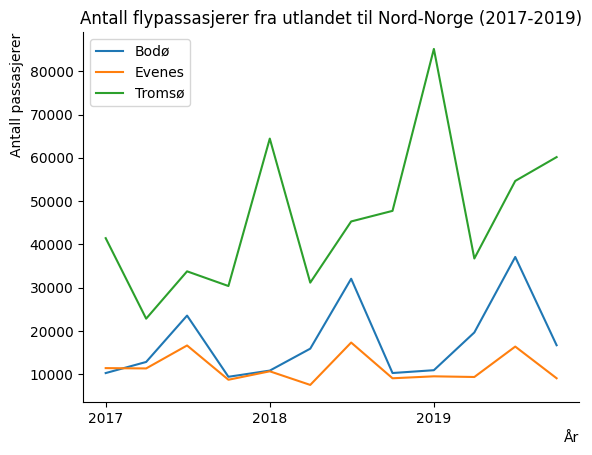

In [333]:
df_flystat, df_id, ds = apiToDataframe(postUrl, apiQuery)
df_flystat = df_flystat.pivot(index='kvartal', columns='lufthavn', values='value').reset_index()
df_flystat['kvartal'] = df_flystat['kvartal'].str.replace('K', 'Q')
df_flystat['kvartal'] = pd.to_datetime(df_flystat['kvartal'])

fig1, ax = plt.subplots()
ax.set_ylabel('Antall passasjerer', loc='top')
ax.set_xlabel('År', loc='right')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(df_flystat['kvartal'],df_flystat["Bodø"], label='Bodø')
ax.plot(df_flystat['kvartal'],df_flystat["Harstad/Narvik Evenes"], label='Evenes')
ax.plot(df_flystat['kvartal'],df_flystat["Tromsø Langnes"], label='Tromsø')
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.legend(loc='upper left')
ax.title.set_text('Antall flypassasjerer fra utlandet til Nord-Norge (2017-2019)')
ax.plot


Mengden internasjonale flyvninger som reiste til Tromsø Lufthavn økte med 20% i 2019. For Bodø Lufthavn økte den med 22% (SSB, tabell 08508). Vi kunne forventet en fortsettelse av denne økningen hadde ikke pandemien lammet reisenæringen. Utenlandske flyvninger til Nord-Norge har et toppunkt i vinterperiodene, hvor vi ser flere store utenlandske aktører som Lufthansa, Austrian og Air France setter opp direkte flyvninger til Tromsø.

### Cruiseturisme
Turister som velger å reise langs kysten, reiser hovedsakelig med Hurtigruten eller i cruisebåter. Tromsø ligger klart på topp i antall besøkende cruisepassasjerer. I 2019 ankom besøkende 155 160 cruisepassasjerer havnen i Tromsø. Hvor av 57 unike cruisebåter besøkte Tromsø Havn. Honningsvåg ligger bak med 44 unike båter, og 23 båter besøkte Leknes (Kystverket). Turister velger også å feriere ved å ta ekspedisjonscruise langs kysten, samt nordover mot Svalbard. 

### Hotellnæringen
Hotellnæringen har nytt godt av de store turiststrømmer i Nord-Norge. Flere hotellaktører har vist interesse for store byggeprosjekter, samtidig som de eksisterende hotellene opplever stor etterspørsel. De største hotellaktørene som Scandic, Choice og Thon besitter majoriteten av hoteller i tettstedene med høy turisme. Det er 4500 personer sysselsatt innenfor overnattings- og serveringsvirksomhet i Nordland fylke i 2019. For Troms og Finnmark var dette tallet på 5200 personer (SSB, tabell 09266). For antall overnattinger mellom 2017 og 2019 er det klart Nordland som mottok flest overnattende turister, med et toppunkt i sommermånedene. I 2019 gjestet hoteller i Nordland 694 997 utenlandske turister, en økning i underkant av 10%. For Troms var mengden overnattende turister 610 745 i 2019, en økning på 11%. Fylket mottar i tillegg en større andel vinterlige turister. For Finnmark var det 264 152 overnattende turister i 2019, en økning på 2%. (SSB, tabell 08401) 

Hoteller i Nord-Norge har klart gjort det godt i mange år, og tjener godt på turisme i høysesonger. 

In [374]:
postUrl = 'https://data.ssb.no/api/v0/no/table/08401/'

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "agg_single:Fylker1972",
        "values": [
          "18",
          "19",
          "20"
        ]
      }
    },
    {
      "code": "Landkoder2",
      "selection": {
        "filter": "item",
        "values": [
          "ccc"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Overnattinger"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2017M01",
          "2017M02",
          "2017M03",
          "2017M04",
          "2017M05",
          "2017M06",
          "2017M07",
          "2017M08",
          "2017M09",
          "2017M10",
          "2017M11",
          "2017M12",
          "2018M01",
          "2018M02",
          "2018M03",
          "2018M04",
          "2018M05",
          "2018M06",
          "2018M07",
          "2018M08",
          "2018M09",
          "2018M10",
          "2018M11",
          "2018M12",
          "2019M01",
          "2019M02",
          "2019M03",
          "2019M04",
          "2019M05",
          "2019M06",
          "2019M07",
          "2019M08",
          "2019M09",
          "2019M10",
          "2019M11",
          "2019M12"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

Text(1, 0.14, 'Figur 2.1')

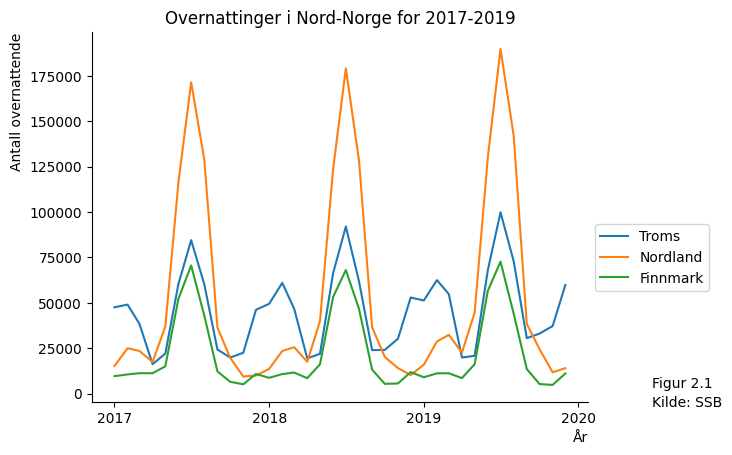

In [423]:
df, df_id, ds = apiToDataframe(postUrl, apiQuery)

df = df.pivot(index="måned", columns="region", values="value")

df = df.reset_index()

df['måned'] = pd.to_datetime(df['måned'], format='%YM%m', errors='coerce')

fig1, ax = plt.subplots()
ax.set_ylabel('Antall overnattende', loc='top')
ax.set_xlabel('År', loc='right')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(df['måned'], df["Troms - Romsa (-2019)"], label='Troms')
ax.plot(df['måned'], df["Nordland - Nordlánnda"], label='Nordland')
ax.plot(df['måned'], df["Finnmark - Finnmárku (-2019)"], label='Finnmark')
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.title.set_text('Overnattinger i Nord-Norge for 2017-2019')


plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))


plt.text(1, .1, 'Kilde: SSB', fontsize=10, transform=plt.gcf().transFigure)
plt.text(1, .14, 'Figur 2.1', fontsize=10, transform=plt.gcf().transFigure)

 
(Graf med antall overnattinger i Nord-Norge.)
 
(Graf med antall sysselsatte innenfor overnattingsnæring)


In [336]:
postUrl = 'https://data.ssb.no/api/v0/no/table/09266/'

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "agg_single:Fylker1972",
        "values": [
          "18",
          "19",
          "20"
        ]
      }
    },
    {
      "code": "Reiseliv",
      "selection": {
        "filter": "item",
        "values": [
          "SUMRL"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2017",
          "2018",
          "2019"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [337]:
df_syssel, df_id, ds = apiToDataframe(postUrl, apiQuery)
df_syssel = df_syssel.pivot(index="år", columns="region", values="value").reset_index()

Text(2.8, 1, 'Kilde: SSB')

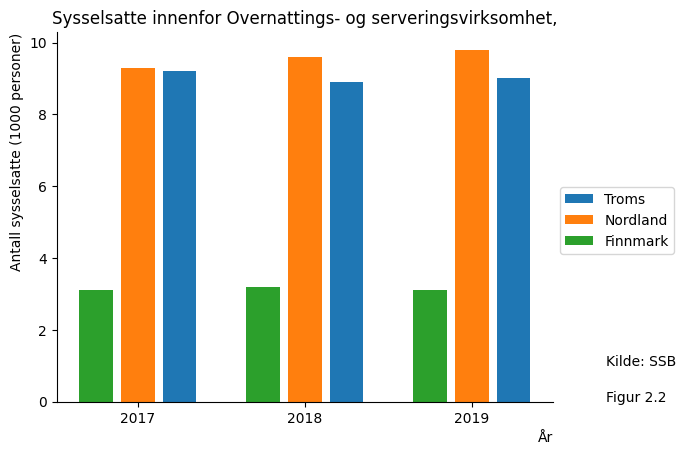

In [372]:
fig, ax = plt.subplots()
ax.set_ylabel('Antall sysselsatte (1000 personer)', loc='top')
ax.set_xlabel('År', loc='right')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

r = np.arange(3)

ax.bar(r+0.25, df_syssel["Troms - Romsa (-2019)"],0.2, label='Troms')
ax.bar(r, df_syssel["Nordland - Nordlánnda"],0.2, label='Nordland')
ax.bar(r-0.25, df_syssel["Finnmark - Finnmárku (-2019)"],0.2, label='Finnmark')

plt.title("Sysselsatte innenfor Overnattings- og serveringsvirksomhet,")
plt.xticks(r, df_syssel["år"])
ax.legend(bbox_to_anchor=(1,0.6));

plt.annotate('Figur 2.2', (0,0), (2.8,0), fontsize=10)
plt.annotate('Kilde: SSB', (0,0), (2.8,1), fontsize=10)

In [339]:
postUrl = 'https://data.ssb.no/api/v0/no/table/12937/'

apiQuery = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "agg_single:Fylker2019",
        "values": [
          "18",
          "19",
          "20"
        ]
      }
    },
    {
      "code": "NACE2007",
      "selection": {
        "filter": "vs:NACE2007StrHoved",
        "values": [
          "I"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Oms"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2017",
          "2018",
          "2019"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

In [340]:
df_omset_overnatt, df_id, ds = apiToDataframe(postUrl, apiQuery)

df_omset_overnatt = df_omset_overnatt.pivot(index="år", columns="region", values="value").reset_index()

Text(2.8, 150, 'Kilde: SSB')

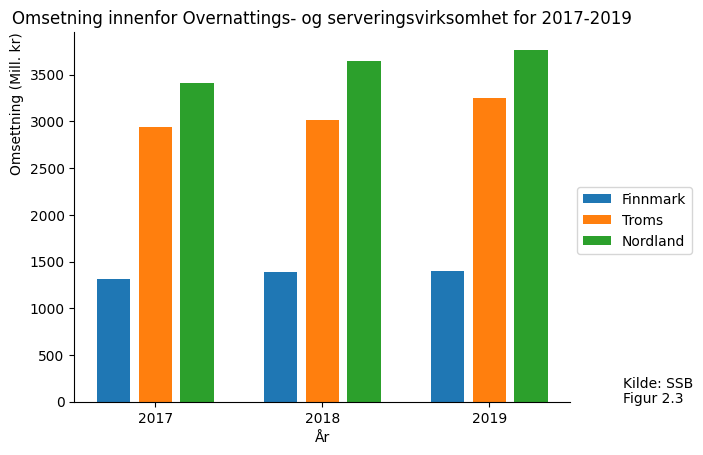

In [362]:
fig, ax = plt.subplots()
ax.set_ylabel('Omsettning (Mill. kr)', loc='top')
ax.set_xlabel('År', loc='center')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

r = np.arange(3)

ax.bar(r-0.25, df_omset_overnatt["Finnmark - Finnmárku (-2019)"],0.2, label='Finnmark')
ax.bar(r, df_omset_overnatt["Troms - Romsa (-2019)"],0.2 ,label='Troms')
ax.bar(r+0.25, df_omset_overnatt["Nordland - Nordlánnda"], 0.2,label='Nordland')
plt.legend(bbox_to_anchor=(1,0.6))
plt.xticks(r, df_syssel["år"])

plt.title("Omsetning innenfor Overnattings- og serveringsvirksomhet for 2017-2019")
plt.annotate('Figur 2.3', (0,20), (2.8,-10), fontsize=10)
plt.annotate('Kilde: SSB', (0,150), (2.8,150), fontsize=10)

### Populære veistrekninger
Som nevnt tidligere er det mange turister som velger å fly til Evenes for å så kjøre langs E10 innover mot Lofoten, eller flyr til Bodø for å ta fergen mellom Bodø og Moskenes. I 2022 var det 89 010 tellinger på denne fergestrekningen (Ferjedatabasen kilde) Lofoten-distriktet er svært populært blant sommermånedene, noe som utfordre den trange kapasiteten til veinettet. Hvor store deler av europaveien mangler to felt, samt utsatt for steinras. 


Lengre sør i Nordland ligger kystriksveien, Riksvei 17, som strekker fra Steinkjer til Bodø. Kystriksveien er Norges lengste turistvei, og høyt trafikkert i sommerperioden, spesielt på grunn av bobilturismen. Strekningen har derimot slitt med lange fergekøer, langs de seks fergeforbindelsene som knytter riksvei 17 sammen. Timelange fergekøer har bydd på utfordinger for beboere i nærmiljøet, samtidig som kollektivtransport og godsbiler ikke når frem i rute. ()

## Kap 3
-------
I dette kapittelet ser vi på hvordan en turistskatt kan endre den sammfunnsøkonomiske dynamikken i Nord-Norge. Vi vil her se på hvordan en avgift påvirker markedets tilbud og etterspørsel. Vi tar utgangspunkt i 



Skal turistskatt innføres, kan dette gjøres på ulike måter. En av dem er gjennom hotellovernattinger. Dette vil si at en viss andel av regningen turister betaler for overnattinger hos hoteller, eller campingsteder, går som turistskatt. Dette er en effektiv måte å innføre en slik skatt. Samtidig gjør dette at turister bidrar til å dekke utgifter for slitasjen i nærområdet. Dette omfatter derimot ikke private virksomheter innenfor overnatting. Overnattinger som gjøres i privat sammenheng, blant annet gjennom plattformer som Airbnb. SSB fører ikke statestikk for privat utleie av boliger, og dermed er det vanskelig å si hvor stor andel av overnattinger som gjøres i privat sammenheng.


Slik det er i dag merker ikke produsentene noen form for avgift. Skulle det derimot bli inføres en turistskatt for produsentene i turistnæringer, ville dette ført til et skift i tilbuds- og etterspørselskurven for markedet. For å se nærmere på dette, kan vi bruke en enkel modell for etterspørsel og tilbud. Her tar vi utgangspunkt i et marked med fullkommen konkurranse. Det vil si at 
1. Prisen i markedet blir fastsatt av et sammspill mellom konsumentene og produsentene
2. Ingen produsenter eller konsumenter er store nok til å ha markesmakt
3. Produsentene produserer identiske varer eller tjenester (Homogene varer/tjenester)
4. Full informajon er tilgjengelig for konsumentene og produsentene

Grunnen for at vi tar utgangspunkt i en slik markedsmodell med fullkommen konkurranse, er at dette sikrer en optimal ressursallokering, samt at det gir samfunnsøkonomisk stabilitet. Med dette i betrakning, så er det ikke usansynlig at også markedet innenfor hoteller og andre turistrelaterte produsenter vil reagere på lik måte. 

Vi setter vi opp etterspørsel og tilbud opp som en formel, hvor vi ser på pris og mengde. Tilbudskurven viser til hvor mye produsentene er villige til å selge varer eller tjenester til ulike priser. 

### Produsentenes adferd 

Loven om det stigende tilbud viser til at produsentene er villige til å produsere mer av et gode, hvis prisen stiger. Nedenfor kan vi se at produsentene tjener det som er markedsprisen $p$ minus turistskatten på $t$ kroner, derfor blir formelen for tilbud slik: 

$$X^S = S(p-t)$$

For produsenten skapes det et produsentoverskudd. Dette kan være et mål for produsentens velferd, men defineres som mengden som produserers, samt selges, minus variable kostnader. For at en produsent skal være villige til å produsere og selge et gode, må de oppnå en minstepris. Dette kalles også for reservasjonsprisen. Produsenter med en lavere reservasjonspris en hva markedsprisen, vil være villige til å selge til en høyere pris. Setter vi opp en formel for produsentoverskudd, får vi:

$$PO(x) = p x - C(x)$$

### Konsumentenes adferd
Konsumenter ettersprøsel viser til hva konsumenten er villig til å betale for en ekstra enhet av et gode. Dette kalles også for den marginale betalingsvilligheten. Dette er også en god indikator for den margianle nytteverdien. For konsumentene er det kurven for etterspørsel fallende, da de er villige til å konsumere mer for et gode, hvis prisen er lavere. I tillegg gjør dette at konsumenter med en lavere kjøpekraft, nå har råd til å kjøpe mer av et godt. For konsumentenes etterspørsel blir formelen slik:

$$x^D = D(x)$$

Konsumentoverskudd er et mål på velferden ovenfor konsumentene. Det kan defineres som oppstår når konsumenter er villige til å betale mer for en mengde, en det de faktisk betaler for godet. Satt opp som en formel får vi at konsumentoverskudd er lik den samlede betalingsvilligheten minus prisen på den mengden konsumenten faktisk kjøper.

$$KO = B(x) - p x$$

Text(90, -10, 'Figur 3.1')

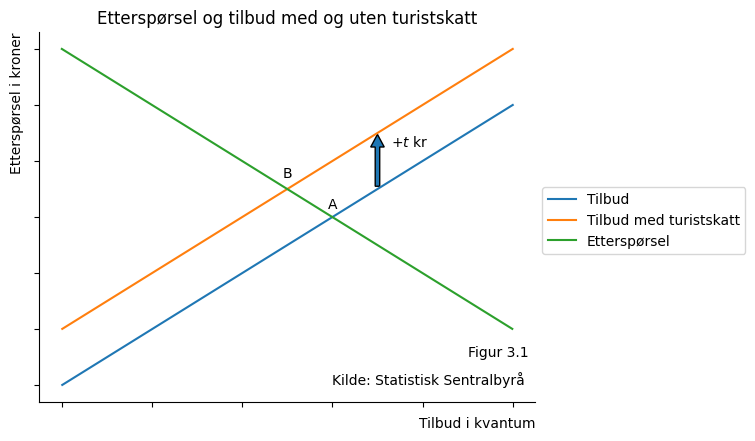

In [342]:
#FIGUR 3.1

x_num=np.linspace(0.1,100,100)

fig, ax = plt.subplots()
ax.set_ylabel('Etterspørsel i kroner', loc='top')
ax.set_xlabel('Tilbud i kvantum', loc='right')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


ax.arrow(70, 51, 0, 14, width = 1)
ax.text(73, 65, '$+t$ kr', fontsize=10)
ax.text(49, 54, 'B', fontsize=10)
ax.text(59, 43, 'A', fontsize=10)

ax.plot(x_num,x_num-20, label='Tilbud')
ax.plot(x_num,x_num, label='Tilbud med turistskatt')
ax.plot(100-1*x_num, x_num, label='Etterspørsel')
ax.legend(bbox_to_anchor=(1,0.6))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.title("Etterspørsel og tilbud med og uten turistskatt")
plt.annotate('Kilde: Statistisk Sentralbyrå', (0,20), (60,-20), fontsize=10)
plt.annotate('Figur 3.1', (0,20), (90,-10), fontsize=10)

Som en konsekvens av skatten, blir produsentenes tilbudskurve dyttet oppover, slik vi ser i figur 3.1. Det vil gi en ny likevektspris som ligger i punket B, her har prisen blitt høynet, samtidig som mengden omsatt blir redusert. Dette skaper en kile mellom hva konsmentene betaler og hva produsentene tjener etter skatt. Som en konsekvens kan det medføre at produsenter velger å økte prisene, for å innhente tapet i inntekter. 

Text(90, -10, 'Figur 3.2')

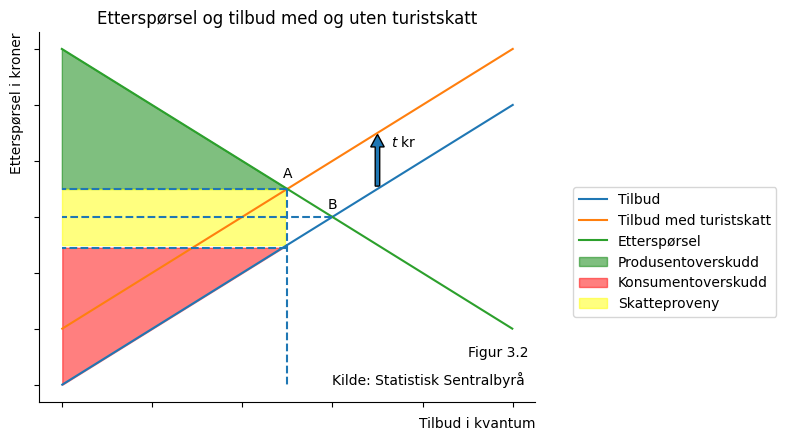

In [343]:
#FIGUR 3.2

x_num=np.linspace(0.1,100,100)

fig, ax = plt.subplots()
ax.set_ylabel('Etterspørsel i kroner', loc='top')
ax.set_xlabel('Tilbud i kvantum', loc='right')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


ax.arrow(70, 51, 0, 14, width = 1)
ax.text(73, 65, '$t$ kr', fontsize=10)
ax.text(49, 54, 'A', fontsize=10)
ax.text(59, 43, 'B', fontsize=10)

ax.plot(x_num,x_num-20, label='Tilbud')
ax.plot(x_num,x_num, label='Tilbud med turistskatt')
ax.plot(100-1*x_num, x_num, label='Etterspørsel')
ax.set_yticklabels([])
ax.set_xticklabels([])

ax.vlines(50,50, -20, linestyles='dashed', clip_on=False)
ax.hlines(29,50, 0, linestyles='dashed', clip_on=False)
ax.hlines(50,50, 0, linestyles='dashed', clip_on=False)
ax.hlines(40,60, 0, linestyles='dashed', clip_on=False)

ax.fill_between(100-1*x_num, 50,x_num,where=(x_num>=50),color='green', alpha=0.5, label='Produsentoverskudd')
#ax.fill_between(x_num, 50,x_num-20,where=(x_num<50),color='grey', alpha=0.5, label='Skatteproveny')
ax.fill_between(x_num, 29,x_num-20,where=(x_num<50),color='red', alpha=0.5, label='Konsumentoverskudd')

ax.fill_between(x_num, 50,30,where=(x_num<50),color='yellow', alpha=0.5, label='Skatteproveny')
#ax.fill_betweenx(x_num, x_num,100-1*x_num,color='grey', alpha=0.5, label='Dødvektstap')


ax.legend(bbox_to_anchor=(1.5,0.6))

#ax.fill_between(100-1*x_num, x_num, where=(x_num>=50), alpha=0.5)

plt.title("Etterspørsel og tilbud med og uten turistskatt")
plt.annotate('Kilde: Statistisk Sentralbyrå', (0,20), (60,-20), fontsize=10)
plt.annotate('Figur 3.2', (0,20), (90,-10), fontsize=10)

Vi ser i figur 3.2 ovenfor at så snart en skatt blir introdusert, vil konsumoverskuddet og produsentoverskudde oppleve et kutt. Dette er et resultat av skatteprovenyen. Skatteprovenyen gjør det slik at produsentene velger å omjustere produksjon. Dette vil være noe som ikke nødvendigvis er det mest effektive ressursallokeringen i et samfunnsøkonomisk perspektiv. Grunnen til dette er fordi det oppstår et dødvektspunkt, som er det samfunnsøkonomiske tapet. Dødvektstapet kan variere, men er stort sett avhengig av elastiteten til et gode. Siden turistrelaterte varer og tjenester er relativt elastiske, vil vi anta at dødvektstapet kan være relativt høyt. Noe som kan være en bekymring for det samfunnsøkonomsike overskudde i sin helhet. Dette består av både konsumentoverskudd og produsentoverskudd, og defineres som: 

$$SO = KO + PO$$

### Priselastisitet

Reise er ikke en nødvendighetsgode, og derfor er det noe som konsumentene ikke er villige til å betale mer for, skulle prisene øke ytterligere. Derfor må en eventuel turistskatt være et tiltak som innføres med forsiktighet, for å ikke knele turiststrømmen til Nord-Norge. Turistnæringen er som sagt et marked med relativ høy priselastitet. Priselastitet tilsier hvordan etterspørselen endrer seg, når prisene endres. Mer nøyaktig, så forteller den hvor stor endringen i etterspørsel på en gode er, hvis godet øker ett prosent i pris. Goder med lav priseleastitet, tilsier at etterspørselen er mindre følsom for endringer i pris. Eksempler på dette er matvarer og strøm. Goder med høy priselastitet, tilsier at etterspørselen er mer følsom for endringer i pris. Klassiske eksempler på dette er nettopp flybilletter eller et opphold på hotell.

### Misnøye med turistskatt for hotellovernattinger
Det har blitt foreslått en skatt for turister som overnatter på utvalgte hoteller i områder spesielt utsatt for stor turistslitasje. Dette har derimot skapt stor misnøye blant hotell- og restaurantaktører. Allerede høye momsavgifter gjør at hoteller i Norge, er et av de dyreste i Europa. NHO uttrykker sterk misnøye for turistskatt ovenfor overnattedene turister, samt mener at hoteller bidrar allerede for turister med parkeringsplasser, toaletter og renovering. Dette kan dempe turistene fra å velge Norge som feriedestinasjon, og samtidig gjøre norske hoteller mindre konkurransedyktige mot utenlandske hoteller. 

# Kapittel 4 - Konklusjon
-------
Turistskatt er noe som lenge har vært diskutert innført i Norge. Forslaget har bare blitt mer aktuelt ettersom turismen i Norge har økt i flere år. Dette har gjort oss mer oppmerksome på de ulempene og kostandene det også medfører samfunnet. Det er derfor viktig at vi ser til hvordan lignende land har håndtert denne problemstillingen turismen har medført, og tar med oss de erfaringene. 

Nord-Norge opplever foreløpig stor innfart av turister, både i sommerhalvåret og vinterhalvåret. Som konsekvens følger det også med større slitasje. Infrastruktur som nødvendigvis ikke er dimensjonert for denne ekstra belastningen. Veinettet i nord er ikke utbygd for å håndtere store trafikkmengder, og inneholder mange flaskehalser, som gjør infrastrukturen sårbar. Den utenlandske interessen gjør også at flyselskaper setter opp nye direkteruter til Nord-Norge, noe som gjør at flyplasser ser seg nødt til å ekspandere for å imøtekomme etterspørselen.

Alt dette gjør at vi er nødt til å se etter måter å kunne finansiere slike kostnader. Nye fellesgoder som offentlige toaletter, rasteplasser og mobildekning er viktige goder som må bli prioritert. Derfor bør Nærings- og fiskeridepartementet vurdere å innføre en turistskatt, for å kunne holde turiststrømmen under kontroll, men samtidig holde Nord-Norge som et attraktivt turistmål. Vedtaket kan derimot ha en negativ effekt for hotellmarkedet, av den grunn er det essensielt at skatteprovenyet blir øremerket for nærmiljøet. Inntektene er ment for å hjelpe infrastruktur i området pengene ble inntjent. Avgiften kan av den grunn gjøre det mulig å holde turismen bærekraftig, også for lokalbefolkningen. 


# Referanse:
1. Goktas, L. S., & Polat, S. (2019). Tourist tax practices in European Union member countries and its applicability in Turkey. Journal of Tourismology, 5(2), 145-158.
2. Buckley, J. (2022, Juni 5). National Geographic. Hentet fra https://www.nationalgeographic.co.uk/travel/2022/06/venice-is-planning-to-introduce-a-tourist-tax-is-this-a-sign-of-things-to-come
3. Kystverket. (28-01-2022). Trender og utvikling i cruisetrafikken i norske farvann mot 2040. Hentet fra https://www.kystverket.no/contentassets/c1386b33f1fb41459587c9a7bfd8547f/trender-og-utvikling-i-cruisetrafikken-i-norske-farvann-mot-2040-jan-2022.pdf
4. Viggo, Andreassen, V., Bredesen, I., & Thøgersen, J. (2020). Innføring i Mikroøkonomi for økonomisk-administrative studier. Oslo: Cappelen Damm Akademisk.
5. Consto, Tromsø lufthavn, Hentet fra https://consto.no/prosjekter/tromso-lufthavn/
6. Avinor, Nye Tromsø Lufthavn, Hentet fra https://avinor.no/flyplass/tromso/planlegg-reisen/nye-tromso-lufthavn/
7. KBNN,(2022), Næringslivets behov for transportinfrastruktur i Nord-Norge, Hentet fra https://www.kbnn.no/files/2022-Rapport-N%C3%A6ringslivets-behov-for-transportinfrastrukturbehov.pdf
8. NHO, (01-12-2022), Stor bekymring for hvem som får regningen for turistskatt, Hentet fra https://www.nhoreiseliv.no/vi-mener/statsbudsjett/nyhet/2022/-stor-bekymring-for-hvem-som-far-regningen-for-turistskatt/
9. Statistisk Sentralbyrå, (16.01.2023), 08508: Lufttransport. Passasjerer, etter lufthavn, trafikktype og innenlands-/utenlandsflygning (avslutta serie) 2009K1 - 2022K4 ,Hentet fra https://www.ssb.no/statbank/table/08508/
10. Statistisk Sentralbyrå, (31.03.2022), 09266: Sysselsetting i reiselivsnæringene (F) 2011 - 2019, Hentet fra https://www.ssb.no/statbank/table/09266/
11. Statistisk Sentralbyrå, (01.02.2020), 08401: Alle overnattingsbedrifter. Overnattingar, etter gjestene sitt bustadland (F) (avslutta serie) 2005M01 - 2019M12, Hentet fra https://www.ssb.no/statbank/table/08401/
12. Statistisk Sentralbyrå, (17.01.2023), 12937: Hovedtall for bedrifter, etter fylke, landsdel og næring (SN2007 hovedområde, 2- og 3-siffernivå) (F) 2017 - 2020, Hentet fra https://www.ssb.no/statbank/table/12937/
13. Ferjedatabanken, (2022), Hentet fra https://ferjedatabanken.no/statistikk
14. Derek J. Clark, Mikko Moilanen and Stein Østbye, The Economy of the North (Tourism in the Arctic), Hentet fra https://www.ssb.no/en/natur-og-miljo/artikler-og-publikasjoner/_attachment/454081?_ts=17bc94cfc98. Statistisk Sentralbyrå
15. Regjeringen, (19.01.2023), Vurderer destinasjoner for besøksbidrag, Hentet fra https://www.regjeringen.no/no/aktuelt/vurderer-destinasjoner-for-besoksbidrag/id2959885/?expand=factbox2959954
